In [21]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [22]:
df_ori = pd.read_csv('diabetic_data.csv')
df = df_ori.copy(deep=True)
#for x in df.columns:
#    print(x, df[x].unique())

In [23]:
#df.head()

In [24]:
# print(df.shape)
# print(df.dtypes)
# class_counts = df.groupby('readmitted').size() 
# print(class_counts)

In [25]:
# # pd.set_option('display.width', 100)
# # pd.set_option('precision', 3)
# # correlations = df.corr(method='pearson')
# # print(correlations) 
# dfcopy = df_ori.copy(deep=True)
numerics = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id',
           'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
           'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
            'number_diagnoses']

others = [col for col in df.columns if col not in numerics]

scaler = MinMaxScaler()
x_num = scaler.fit_transform(df[numerics])
x_all = np.concatenate([x_num, df[others].values], axis =1)

df_copy = pd.DataFrame(data=x_all, columns=numerics+others)

#print(df_copy['race'])
# print("SKEWS")
# skew = df.skew()
# #print(df.head())
# print(skew) 
# print(df['number_diagnoses'])

# #using minmax scaler does not take away skew

# from sklearn.preprocessing import minmax_scale

# for x in numerics:
#     dfcopy[x] = minmax_scale(dfcopy[x])
# print("SKEWS -- minmax")    
# skew = dfcopy.skew()
# print(skew) 
# print(dfcopy['number_diagnoses'])
# # print(df['number_diagnoses'])
# # from sklearn.preprocessing import Normalizer
# # X = dfcopy[numerics].values
# # for x in numerics:
# #     scaler = Normalizer().fit()
# #     normalizedX = scaler.transform([dfcopy[x]])
# # #     #print(normalizedX
# # #     print(dfcopy[x].size, normalizedX.size)
# # #     print(dfcopy[x])
# # #     dfcopy[x] = normalizedX

# # def standardize(raw_data):
# #     return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))
# # dfcopy[numerics] = standardize(dfcopy[numerics])

# # print("SKEWS---Normalized")
# # print(dfcopy['number_diagnoses'])
# # skew = dfcopy.skew()
# # #print(df.head())
# # print(skew) 

In [26]:
# df.hist()
# plt.show()

In [27]:
# df.plot(kind='density', subplots=True, layout=(6,6), sharex=False) 
# plt.show() 

In [28]:
# df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False) 
# plt.show() 

In [29]:
# correlations = df.corr()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# plt.show() 

# from pandas.plotting import scatter_matrix
# scatter_matrix(df)
# plt.show() 

In [30]:
# df['readmitted'] = df['readmitted'].replace('>30', 0)
# df['readmitted'] = df['readmitted'].replace('<30', 1) #should we code it into 1 and 2?
# df['readmitted'] = df['readmitted'].replace('NO', 0)
# df.readmitted.value_counts()

In [31]:
df.drop(columns = ['patient_nbr','citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)
#df.drop(columns = ['citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)

#df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
drop_Idx = set()
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3']=='?'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [32]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
    
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

df['age'] = df['age'].replace('[0-10)', 5)
df['age'] = df['age'].replace('[10-20)', 15)
df['age'] = df['age'].replace('[20-30)', 25)
df['age'] = df['age'].replace('[30-40)', 35)
df['age'] = df['age'].replace('[40-50)', 45)
df['age'] = df['age'].replace('[50-60)', 55)
df['age'] = df['age'].replace('[60-70)', 65)
df['age'] = df['age'].replace('[70-80)', 75)
df['age'] = df['age'].replace('[80-90)', 85)
df['age'] = df['age'].replace('[90-100)', 95)

df['race'] = df['race'].replace('Caucasian', 0)
df['race'] = df['race'].replace('AfricanAmerican', 1)
df['race'] = df['race'].replace('Hispanic', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('Other', 4)

df = df.replace('?', -1)
#df.head()

for col in df:
    print(col, " : ")
    print(df[col].unique())
    

race  : 
[ 0  1 -1  4  3  2]
gender  : 
[0 1]
age  : 
[15 25 35 45 55 65 75 85 95  5]
admission_type_id  : 
[1 2 3 6 4 5 8 7]
discharge_disposition_id  : 
[ 1  3  6  2  5  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28 19
 27]
admission_source_id  : 
[ 7  2  4  1  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital  : 
[ 3  2  1  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures  : 
[ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  66  36  19  64  25  53  52  87  27  37  41  28  48  10   2  65  67
  40  54  58  57  43  32  83  34  39  69  38  72  22  96  46  78  56  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102   7  89  91  92   4 101  99 100 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
num_procedures  : 
[0 5 1 6 2 3 4]
num_medications  : 
[18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 25  4 

In [33]:
# df.loc[(df.diag_1.str.contains('V')),'diag_1']=0
# df.loc[(df.diag_1.str.contains('E')),'diag_1']=0

# df.loc[(df.diag_2.str.contains('V')),'diag_2']=0
# df.loc[(df.diag_2.str.contains('E')),'diag_2']=0

# df.loc[(df.diag_3.str.contains('V')),'diag_3']=0
# df.loc[(df.diag_3.str.contains('E')),'diag_3']=0

# for i in df['diag_1']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_2']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_3']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))

diags = ['diag_1','diag_2','diag_3']
    
def detection(value):
    if value[0]== "V" or value[0] == 'E':
        value = '0'
        return value # from new york united healthcare
    else:
        return value
    
for f in diags:
    for i in df[f].index:
        df[f].at[i] = detection(df[f].at[i])
        
for i in df['diag_1']:
    b = 'V' in str(i)
    c = 'E' in str(i)
    if b or c:
        print(str(i))

    

In [34]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
#print("geelo ", df.columns)
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)
df.dtypes

race                         int64
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone                int64
acarbose                     int64
miglitol            

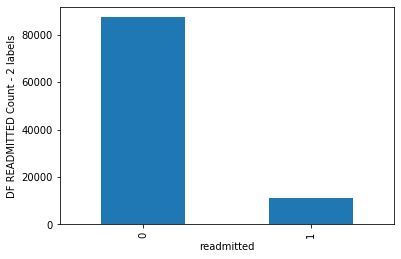

[0 1]


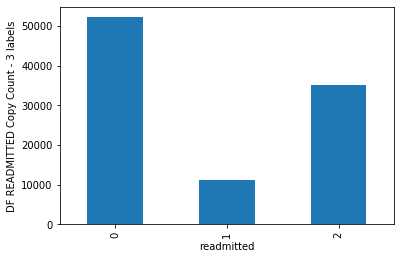

[2 0 1]


In [35]:
#df_age = pd.get_dummies(df['age'])
#df_race = pd.get_dummies(df['race'])
#df_gender = pd.get_dummies(df['gender'])
#df_change = pd.get_dummies(df['change'])
#df_diabetesMed = pd.get_dummies(df['diabetesMed'])

df_max_glu_serum = pd.get_dummies(df['max_glu_serum'])
df_A1Cresult = pd.get_dummies(df['A1Cresult'])
df_insulin = pd.get_dummies(df['insulin'])
df_discharge_disposition_id = pd.get_dummies(df['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(df['admission_source_id'])
df_admission_type_id = pd.get_dummies(df['admission_type_id'])

#print(df_max_glu_serum)
#df = pd.concat([df,df_max_glu_serum])
#df.drop(['max_glu_serum'], axis=1, inplace=True)             
df = pd.concat([df,df_max_glu_serum, df_A1Cresult, 
                df_insulin, df_discharge_disposition_id, 
                df_admission_source_id, df_admission_type_id], axis=1)
df.drop([ 'max_glu_serum', 'A1Cresult', 'insulin','discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)
#before

#print(df.shape)
# df = df['readmitted' == 1 or 'readmitted' == 0]
#df.readmitted = np.where(df.readmitted=2, 0, df.readmitted)
#after
# df.groupby('readmitted').size().plot(kind='bar')
# plt.ylabel('Count')
# plt.title("AFTER CHANGE")
# plt.show()
# #print(df.iloc[0])
# #df.head()
# df.head()

dfcopy = df.copy(deep=True)
df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'] = df['readmitted'].replace('<30', 1) #should we code it into 1 and 2?
df['readmitted'] = df['readmitted'].replace('NO', 0)
#f.readmitted.value_counts()

df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('DF READMITTED Count - 2 labels')
plt.show()
print(df['readmitted'].unique())

dfcopy['readmitted'] = dfcopy['readmitted'].replace('>30', 2)
dfcopy['readmitted'] = dfcopy['readmitted'].replace('<30', 1) 
dfcopy['readmitted'] = dfcopy['readmitted'].replace('NO', 0)
#f.readmitted.value_counts()

dfcopy.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('DF READMITTED Copy Count - 3 labels')
plt.show()
print(dfcopy['readmitted'].unique())

In [36]:
from sklearn.model_selection import train_test_split

feature_col_names = df.columns
#print(df.columns)
#x = df[feature_col_names]
#x = x.drop('readmitted', axis=1)
x = df.loc[:, df.columns != 'readmitted']
y = df['readmitted']
#print(x.columns, y)
#print(y.unique())
#print(x, y)
#print(x.iloc[0])
#print(y.iloc[0])
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

x_copy = dfcopy.loc[:, dfcopy.columns != 'readmitted']
y_copy = dfcopy['readmitted']

X_train_copy, X_test_copy, Y_train_copy, Y_test_copy = train_test_split(x_copy, y_copy, test_size=0.20, random_state=1)

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# TWO CLASS LABELS _ BINARY
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(x.values, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(x.columns))
X_train_SMOTE, X_test_SMOTE, Y_train_SMOTE, Y_test_SMOTE = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

# print(X_dev)
# print(Y_dev)

Original dataset shape Counter({0: 87351, 1: 11250})
New dataset shape Counter({0: 87351, 1: 87351})


In [38]:
# THREE CLASS LABELS
print('Original dataset shape {}'.format(Counter(y_copy)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(x_copy.values, y_copy)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(x_copy.columns))
X_train_copy_SMOTE, X_test_copy_SMOTE, Y_train_copy_SMOTE, Y_test_copy_SMOTE = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 52178, 2: 35173, 1: 11250})
New dataset shape Counter({2: 52178, 0: 52178, 1: 52178})


In [39]:
#print(x.iloc[[2, 3, 4]].values)
#print(x.values[[2, 3, 4]])

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(x[:250], y[:250]):
    print("Going....")
    model = Sequential()
    model.add(Dense(12, input_dim=94, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Fit the model
    model.fit(x[:250].values[train], y[:250].values[train], epochs=150, batch_size=10, verbose=0)
# evaluate the model
    scores = model.evaluate(x[:250].values[test], y[:250].values[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Going....
accuracy: 92.00%
Going....
accuracy: 92.00%
Going....
accuracy: 92.00%
Going....
accuracy: 88.00%
Going....
accuracy: 92.00%
Going....
accuracy: 88.00%
Going....
accuracy: 84.00%
Going....
accuracy: 88.00%
Going....
accuracy: 88.00%
Going....
accuracy: 72.00%
87.60% (+/- 5.78%)


In [41]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(x_copy[:250], y_copy[:250]):
    print("Going....")
    model = Sequential()
    model.add(Dense(12, input_dim=94, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Fit the model
    model.fit(x_copy[:250].values[train], y_copy[:250].values[train], epochs=150, batch_size=10, verbose=0)
# evaluate the model
    scores = model.evaluate(x_copy[:250].values[test], y_copy[:250].values[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Going....
accuracy: 8.00%
Going....
accuracy: 8.00%
Going....
accuracy: 12.00%
Going....
accuracy: 12.00%
Going....
accuracy: 12.00%
Going....
accuracy: 16.00%
Going....
accuracy: 12.00%
Going....
accuracy: 12.00%
Going....
accuracy: 12.00%
Going....
accuracy: 16.00%
12.00% (+/- 2.53%)


In [42]:
def printStats(model):
    x_scaled = preprocessing.scale(x)
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='accuracy')
    print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='roc_auc')
    print("ROC-AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    results = cross_val_score(model, x_scaled , y, cv=10, scoring='neg_log_loss') 
    print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
    # for some reason this piece of code not working with SVM
    
def printStatsSVM(model):
    x_scaled = preprocessing.scale(x)
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='accuracy')
    print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='roc_auc')
    print("ROC-AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    #results = cross_val_score(model, x_scaled[:50] , y[:50], cv=3, scoring='neg_log_loss') 
    #print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
    # for some reason this piece of code not working with SVM
    
def printROC(Y_test, preds, title):
    from sklearn.metrics import roc_auc_score, roc_curve
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, preds)
    plt.subplots(1, figsize=(10,10))
    plt.title(title)
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('roc_auc_score for DecisionTree: ', roc_auc_score(Y_test, preds))
    from sklearn.metrics import classification_report
    report = classification_report(Y_test, preds)
    print(report)

In [43]:
from sklearn import tree
# cross validation - dont rlly need to use sklearn just to compare
#run minmax scaler every time in loop for cross valscore
print("WITHOUT SMOTE-BINARY")
clf = tree.DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, preds)))
#cm = confusion_matrix(Y_test, preds)
#print(cm)

print("SMOTE-BINARY")
clf = tree.DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
clf.fit(X_train_SMOTE, Y_train_SMOTE)
preds = clf.predict(X_test_SMOTE)
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test_SMOTE, preds)))
#cm = confusion_matrix(Y_test_SMOTE, preds)
#print(cm)
#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(clf,x,y, cv=10))))

print("WITHOUT SMOTE - TRIPLE")
clf = tree.DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
clf.fit(X_train_copy, Y_train_copy)
preds = clf.predict(X_test_copy)
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test_copy, preds)))

print("SMOTE - TRIPLE")
clf = tree.DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
clf.fit(X_train_copy_SMOTE, Y_train_copy_SMOTE)
preds = clf.predict(X_test_copy_SMOTE)
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test_copy_SMOTE, preds)))

WITHOUT SMOTE-BINARY
Accuracy is 0.82
SMOTE-BINARY
Accuracy is 0.90
WITHOUT SMOTE - TRIPLE
Accuracy is 0.48
SMOTE - TRIPLE
Accuracy is 0.56


In [44]:
#printStats(clf)
#printROC(Y_dev, preds, 'ROC Curve - Decison Tree')
#cm = confusion_matrix(Y_test, preds)
#cm = confusion_matrix(Y_test_SMOTE, preds)
#print(cm)

In [45]:
#print(Xt.shape) # adding to avoid warning
from sklearn.linear_model import LogisticRegression

print("WITHOUT SMOTE- BINARY")
X_train_scaled = preprocessing.scale(X_train) #scaling to avoid convergence warning
scaler = preprocessing.StandardScaler().fit(X_train) 
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
preds = model.predict(X_test_scaled)
#cm = confusion_matrix(Y_test, preds)
#print(cm)
print("ACCURACY " , accuracy_score(Y_test, preds))

print("SMOTE - BINARY")

X_train_scaledSM = preprocessing.scale(X_train_SMOTE) #scaling to avoid convergence warning
scaler = preprocessing.StandardScaler().fit(X_train_SMOTE) 
X_test_scaledSM = scaler.transform(X_test_SMOTE)
model = LogisticRegression()
model.fit(X_train_scaledSM, Y_train_SMOTE)
preds = model.predict(X_test_scaledSM)
#cm = confusion_matrix(Y_test_SMOTE, preds)
#print(cm)
print("ACCURACY " , accuracy_score(Y_test_SMOTE, preds))

print("WITHOUT SMOTE - TRIPLE")
X_train_scaled_copy = preprocessing.scale(X_train_copy) #scaling to avoid convergence warning
scaler = preprocessing.StandardScaler().fit(X_train_copy) 
X_test_scaled_copy = scaler.transform(X_test_copy)
model = LogisticRegression()
model.fit(X_train_scaled_copy, Y_train_copy)
preds = model.predict(X_test_scaled_copy)
#cm = confusion_matrix(Y_test, preds)
#print(cm)
print("ACCURACY " , accuracy_score(Y_test_copy, preds))


print("SMOTE - TRIPLE")

X_train_scaledSM_copy = preprocessing.scale(X_train_copy_SMOTE) #scaling to avoid convergence warning
scaler = preprocessing.StandardScaler().fit(X_train_copy_SMOTE) 
X_test_scaledSM_copy = scaler.transform(X_test_copy_SMOTE)
model = LogisticRegression()
model.fit(X_train_scaledSM_copy, Y_train_copy_SMOTE)
preds = model.predict(X_test_scaledSM_copy)
#cm = confusion_matrix(Y_test_SMOTE, preds)
#print(cm)
print("ACCURACY " , accuracy_score(Y_test_copy_SMOTE, preds))

# from sklearn.model_selection import cross_validate, cross_val_score
# num_folds = 10
# seed = 1
# num_instances = len(X_train)
# kfold = cross_validate.Kfold(n=num_instances, n_folds=num_folds, random_state=seed)
# results = cross_val_score(model, x, y.ravel(), cv=kfold)

#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(model, x, y, cv=10))))

WITHOUT SMOTE- BINARY
ACCURACY  0.882206784645809
SMOTE - BINARY
ACCURACY  0.6206176125468648
WITHOUT SMOTE - TRIPLE
ACCURACY  0.5632067339384412
SMOTE - TRIPLE
ACCURACY  0.46021656498546654


In [46]:
#printStats(model)
#printROC(Y_dev, preds, 'ROC Curve - Logistic Regression')

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix

print("WITHOUT SMOTE - BINARY")
nb = GaussianNB()
nb.fit(X_train, Y_train) 
preds = nb.predict(X_test) 
#cm = confusion_matrix(Y_test, preds)
print("ACCURACY " , accuracy_score(Y_test, preds))
#print(cm)

print("SMOTE - BINARY")
nb = GaussianNB()
nb.fit(X_train_SMOTE, Y_train_SMOTE) 
preds = nb.predict(X_test_SMOTE) 
#cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_SMOTE, preds))
#print(cm)


print("WITHOUT SMOTE - TRIPLE")
nb = GaussianNB()
nb.fit(X_train_copy, Y_train_copy) 
preds = nb.predict(X_test_copy) 
#cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_copy, preds))
#print(cm)


print("SMOTE-TRIPLE")
nb = GaussianNB()
nb.fit(X_train_copy_SMOTE, Y_train_copy_SMOTE) 
preds = nb.predict(X_test_copy_SMOTE) 
#cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_copy_SMOTE, preds))
#print(cm)
#not working well accuracy is 13%
#naive bayes is a "binary" classifier it gets a better accuracy when there is only 0 and 1
#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(nb, x, y, cv=10))))

#printStats(nb)
#printROC(Y_dev, preds, 'ROC Curve - Naive Bayes')

WITHOUT SMOTE - BINARY
ACCURACY  0.26692358399675475
SMOTE - BINARY
ACCURACY  0.5500987378724135
WITHOUT SMOTE - TRIPLE
ACCURACY  0.3776177678616703
SMOTE-TRIPLE
ACCURACY  0.40879036637173793


In [48]:
from sklearn.neural_network import MLPClassifier
print("WITHOUT SMOTE - BINARY")
clf = MLPClassifier()
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
print("Accuracy Score:  ", accuracy_score(Y_test, preds ))


print("SMOTE - BINARY")
clf = MLPClassifier()
clf.fit(X_train_SMOTE, Y_train_SMOTE)
preds = clf.predict(X_test_SMOTE)
print("Accuracy Score:  ", accuracy_score(Y_test_SMOTE, preds ))

print("WITHOUT SMOTE - TRIPLE")
clf = MLPClassifier()
clf.fit(X_train_copy, Y_train_copy)
preds = clf.predict(X_test_copy)
print("Accuracy Score:  ", accuracy_score(Y_test_copy, preds ))


print("SMOTE - TRIPLE")
clf = MLPClassifier()
clf.fit(X_train_copy_SMOTE, Y_train_copy_SMOTE)
preds = clf.predict(X_test_copy_SMOTE)
print("Accuracy Score:  ", accuracy_score(Y_test_copy_SMOTE, preds ))

#printStats(model)
#printROC(Y_dev, preds, 'ROC Curve - Neural Networks 1 - Cecilia code')

WITHOUT SMOTE - BINARY
Accuracy Score:   0.8806855636123929
SMOTE - BINARY


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Score:   0.8386422827051315
WITHOUT SMOTE - TRIPLE
Accuracy Score:   0.5025100147051367
SMOTE - TRIPLE


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Score:   0.5561056632701952


In [49]:
from sklearn.ensemble import RandomForestClassifier
print("WITHOUT SMOTE - BINARY")
clf = RandomForestClassifier(random_state=0, n_estimators = 150)
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
#cm = cm = confusion_matrix(Y_test, preds)
print("ACCURACY " , accuracy_score(Y_test, preds))
#print(cm)

print("SMOTE - BINARY")
clf = RandomForestClassifier(random_state=0, n_estimators = 150)
clf.fit(X_train_SMOTE, Y_train_SMOTE)
preds = clf.predict(X_test_SMOTE)
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_SMOTE, preds))
#print(cm)

print("WITHOUT SMOTE - TRIPLE")
clf = RandomForestClassifier(random_state=0, n_estimators = 150)
clf.fit(X_train_copy, Y_train_copy)
preds = clf.predict(X_test_copy)
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_copy, preds))
#print(cm)

print("SMOTE - TRIPLE")
clf = RandomForestClassifier(random_state=0, n_estimators = 150)
clf.fit(X_train_copy_SMOTE, Y_train_copy_SMOTE)
preds = clf.predict(X_test_copy_SMOTE)
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_copy_SMOTE, preds))
#print(cm)
#printStats(model)
#printROC(Y_dev, preds, 'ROC Curve - Random Forest')

WITHOUT SMOTE - BINARY
ACCURACY  0.8832716393692004
SMOTE - BINARY
ACCURACY  0.9365215649237286
WITHOUT SMOTE - TRIPLE
ACCURACY  0.5689873738654226
SMOTE - TRIPLE
ACCURACY  0.6474590347206695


In [50]:
# print("WITHOUT SMOTE")
# nn = ml.nnet.nnetClassify() 
# nn.init_weights([Xt.shape[1]] + [0]*1 + [3], 'random', Xt, Yt) # 0 hidden layers, 3 output, 
# nn.train(X_train, Y_train, stopTol=1e-8, stepsize=.25, stopIter=300)
# preds = nn.predict(X_test)
# cm = cm = confusion_matrix(Y_test, preds)
# print("ACCURACY " , accuracy_score(Y_test, preds))
# print(cm)

# print("SMOTE")
# nn = ml.nnet.nnetClassify()
# nn.init_weights([Xt.shape[1]] + [0]*1 + [3], 'random', Xt, Yt) # 0 hidden layers, 3 output, 
# nn.train(X_train, Y_train, stopTol=1e-8, stepsize=.25, stopIter=300)
# preds = nn.predict(X_dev)
# cm = cm = confusion_matrix(Y_dev, preds)
# print("ACCURACY " , accuracy_score(Y_dev, preds))
# print(cm)



# #printStats(model)
# #printROC(Y_dev, preds, 'ROC Curve - Neural Networks')

In [51]:
from sklearn import svm
#testing on small amounts for SVM
print("WITHOUT SMOTE - BINARY")
clf = svm.SVC()
clf.fit(X_train[:250], Y_train[:250])
preds = clf.predict(X_test[:250])
#cm = cm = confusion_matrix(Y_test, preds)
print("ACCURACY " , accuracy_score(Y_test[:250], preds))
#print(cm)

print("SMOTE - BINARY")
clf = svm.SVC()
clf.fit(X_train_SMOTE[:250], Y_train_SMOTE[:250])
preds = clf.predict(X_test_SMOTE[:250])
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_SMOTE[:250], preds))
#print(cm)

print("WITHOUT SMOTE - TRIPLE")
clf = svm.SVC()
clf.fit(X_train_copy[:250], Y_train_copy[:250])
preds = clf.predict(X_test_copy[:250])
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_copy[:250], preds))

print("SMOTE - TRIPLE")
clf = svm.SVC()
clf.fit(X_train_copy_SMOTE[:250], Y_train_copy_SMOTE[:250])
preds = clf.predict(X_test_copy_SMOTE[:250])
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_copy_SMOTE[:250], preds))

#printStatsSVM(clf)
#printROC(Y_dev, preds, 'ROC Curve - Support Vector Machines')
# pick either rbf, adjust gamma

WITHOUT SMOTE - BINARY
ACCURACY  0.864
SMOTE - BINARY
ACCURACY  0.536
WITHOUT SMOTE - TRIPLE
ACCURACY  0.536
SMOTE - TRIPLE
ACCURACY  0.332
